In [1]:
# 观察albumentations工具提供的图像增强效果
import matplotlib.pyplot as plt
import torch
import albumentations as A
import numpy as np
import cv2
from datasets import nii_loader
from utils import drawhistogram

In [2]:
data = nii_loader('LGE')['image']
label = nii_loader('LGE',is_label=True)['image']
image = data[:len(label)]

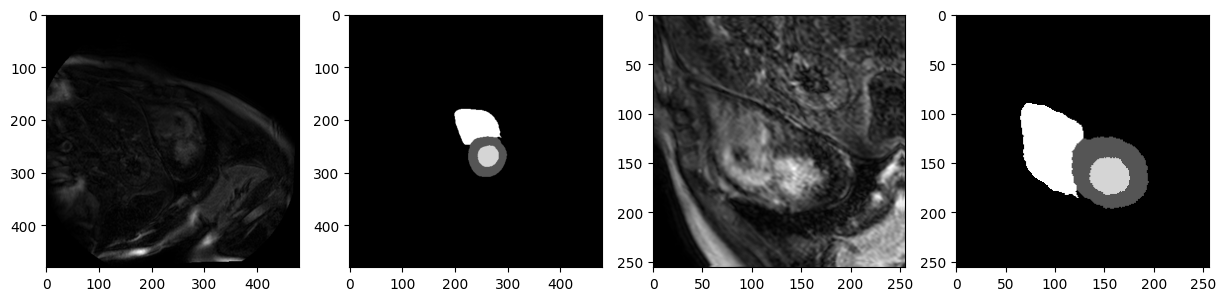

In [193]:
train_transforms = A.Compose([
            #A.Resize(256,256),
            A.CenterCrop(height=256,width=256),
            #A.ShiftScaleRotate(),
            A.ElasticTransform(alpha=200,sigma=20,alpha_affine=20,p=0.5),
            A.RandomRotate90(),
            A.VerticalFlip(),
            A.Transpose(),
        ])
index = 36
re = train_transforms(image=image[index],mask=label[index])
ipro = re['image']
mpro = re['mask']
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image[index],cmap='gray')
plt.subplot(1,4,2)
plt.imshow(label[index],cmap='gray')
plt.subplot(1,4,3)
plt.imshow(ipro,cmap='gray')
plt.subplot(1,4,4)
plt.imshow(mpro,cmap='gray')

In [4]:
from datasets import nii_loader

lge = nii_loader('LGE')
bssfp = nii_loader('C0')
t2 = nii_loader('T2')

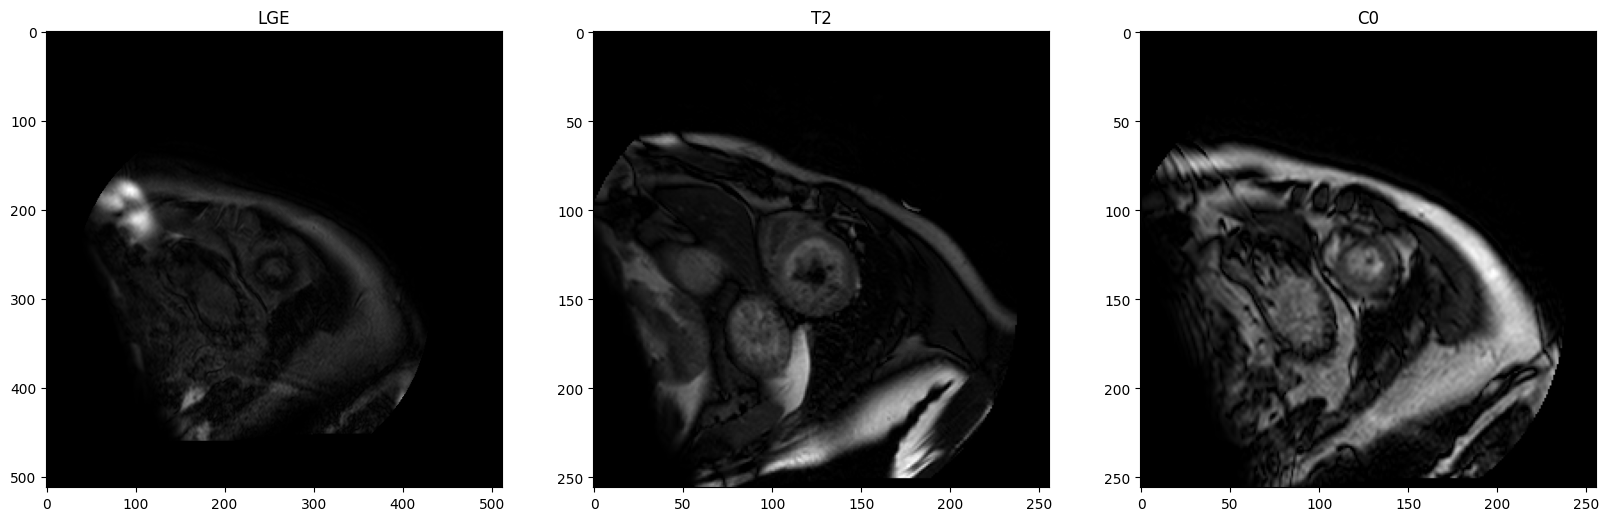

In [5]:
# 测试图像缩放
index = 1
lge1 = lge['image'][index]
bssfp1 = bssfp['image'][index]
t21 = t2['image'][index]

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(1,3,1).set_title('LGE')
plt.imshow(lge1,cmap='gray')
plt.subplot(1,3,2).set_title('T2')
plt.imshow(t21,cmap='gray')
plt.subplot(1,3,3).set_title('C0')
plt.imshow(bssfp1,cmap='gray')

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
8.0


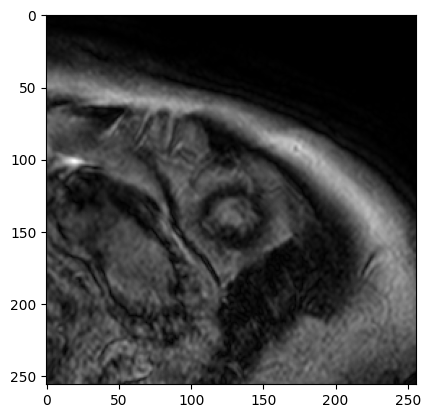

In [6]:
import albumentations as A
import torchvision.transforms as T
import torch
crop1 = A.CenterCrop(256,256)(image=lge1)['image']
crop1 = A.Resize(256,256)(image=crop1)['image']
#crop2 = t21[128:384,128:384]
ce = T.CenterCrop(200)
crop3 = ce(torch.tensor(t21))
print(crop3)
print(lge1[129,129])
#print((crop1==crop2).all())
plt.imshow(crop1,cmap='gray')